### Загрузите данные и подготовьте их к анализу

В ходе работы мне предстоит проанализировать компанию, работающую над приложением Procrastinate Pro+. 
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Я буду работать с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года.

Необходимо загрузить данные, выполнить их переработку, построить графики, используя бизнес-показатели, сделать по ним выводы, обозначить причины неэффективности работы компании и предложить способы решения.

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Импортируем нужные библиотеки.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

import seaborn as sns
from numpy import median
import plotly.express as px

Загрузим данные.

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # визиты
    pd.read_csv('/datasets/orders_info_short.csv'),  # заказы
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)

Изучим типы данных.

In [3]:
display(visits.info())
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
display(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
display(costs.info())
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


В данных нет пропусков. 

Необходимо изменить типы данных в столбцах:  Session Start, Session End, Event Dt, dt, так как мы будем работать с датой и временем. 

In [6]:
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Данные о времени преобразованы.

Исследуем данные на предмет дубликатов.

In [7]:
visits.duplicated().sum()

0

In [8]:
orders.duplicated().sum()

0

In [9]:
costs.duplicated().sum()

0

Явных дубликатов нет. 

Не считаю возможным найти неявные дубликаты, так как один и тот же пользователь мог совершать разные покупки, разные пользователи могли начинать сессию в одно время, покупки могли быть совершены на одну и ту же сумму.

Изменим названия колонок на змеиный стиль для более удобной работы.

In [10]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower()

display(visits.columns)
display(orders.columns)
display(costs.columns)

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Index(['dt', 'channel', 'costs'], dtype='object')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Наилучший способ замены, без явного упоминания названий столбцов, молодец

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Обозначу функции для:

создания профилей - get_profiles(), 

расчёта удержания - get_retention(), 

конверсии - get_conversion(), 

LTV и ROI - get_ltv().

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Обозначу функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

Составлю профили пользователей.

In [19]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  


In [20]:
profiles['dt'] = pd.to_datetime(profiles['dt'])
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  datetime64[ns]
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](3), float64(1), int64(1), object(3)
memory usage: 10.4+ MB


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года. Сейчас на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее, чем через две недели после привлечения, поэтому возьмем горизонт анализа 14 дней.

Определяю минимальную и максимальную даты привлечения пользователей.

In [21]:
observation_date = profiles['dt'].max() 
horizon_days = 14  
min_analysis_date = profiles['dt'].min()
max_analysis_date =  observation_date - timedelta(days=horizon_days - 1) 

print('Минимальная дата привлечения пользователей:', min_analysis_date)
print('Максимальная дата привлечения пользователей', max_analysis_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:00
Максимальная дата привлечения пользователей 2019-10-14 00:00:00


Выводы: 

- я составила профили пользователей, объединив 3 файла для будущего анализа. 
- Так как пользователи должны окупаться через 2 недели после привлечения, резонно использовать данные с 1 мая 2019 по 14 октября 2019.

- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.


In [22]:
region = (profiles.pivot_table(
                index='region',
                columns='payer',
                values='user_id',
                aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
region['total'] = region['not_payer'] + region['payer']
region['payer_%'] = (region.payer / (region.not_payer + region.payer) * 100).round(2)
region.sort_values(by = 'payer_%', ascending = False)

payer,not_payer,payer,total,payer_%
region,,,,
United States,93100,6902,100002,6.90
Germany,14365,616,14981,4.11
UK,16875,700,17575,3.98
France,16787,663,17450,3.80


Выводы: 

- пользователи приходят из США, Германии, Великобритании и Франции. 
- подавляющее большинство пользователей из США, они же лучше всех конвертируются.
- наибольшая конверсия у пользователей из США, затем идет Германия, потом Великобритания и меньше всего платящих пользователей во Франции.

- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [23]:
device = (profiles.pivot_table(
                index='device',
                columns='payer',
                values='user_id',
                aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
device['total'] = device['not_payer'] + device['payer']
device['device_payer_%'] = (device['payer'] / (device['not_payer'] + device['payer']) * 100).round(2)
device.sort_values(by = 'device_payer_%', ascending = False)

payer,not_payer,payer,total,device_payer_%
device,,,,
Mac,28130,1912,30042,6.36
iPhone,51097,3382,54479,6.21
Android,32982,2050,35032,5.85
PC,28918,1537,30455,5.05


Выводы: 
- пользователи пользуются такими устройствами, как Mac, iPhone, Android, PC. 
- Больше всего пользователей используют айфоны, а меньше всего PC.
- наибольшая конверсия у пользователей, которые используют Mac, затем идет iPhone, потом Android, меньшая доля платящих пользователей используют PC.

- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [24]:
channel = (profiles.pivot_table(
                index='channel',
                columns='payer',
                values='user_id',
                aggfunc='count')
           .rename(columns={True: 'payer', False: 'not_payer'})
           .sort_values(by='payer', ascending=False)
          )
channel['total'] = channel['not_payer'] + channel['payer']
channel['channel_payer_%'] = (channel['payer'] / (channel['not_payer'] + channel['payer']) * 100).round(2)
channel.sort_values(by = 'channel_payer_%', ascending = False)

payer,not_payer,payer,total,channel_payer_%
channel,,,,
FaceBoom,25587,3557,29144,12.20
AdNonSense,3440,440,3880,11.34
lambdaMediaAds,1924,225,2149,10.47
TipTop,17683,1878,19561,9.60
RocketSuperAds,4096,352,4448,7.91
WahooNetBanner,8100,453,8553,5.30
YRabbit,4147,165,4312,3.83
MediaTornado,4208,156,4364,3.57
LeapBob,8291,262,8553,3.06


Выводы:
- компания использует 11 каналов привлечения
- органических клиентов больше всего, однако их конверсия самая низкая
- самую высокую конверсию клиентов предоставляют такие каналы, как: FaceBoom, AdNonSense, lambdaMediaAds, доля привлеченных платящих клиентов наибольшая
- наименьшую долю платящих клиентов привлекли LeapBob, OppleCreativeMedia

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

- Посчитайте общую сумму расходов на маркетинг.

In [25]:
cotal_costs = costs['costs'].sum()
cotal_costs

105497.30000000002

Выводы: расходы на рекламу большие, посмотрим насколько грамотно распределяются и используются средства.

- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [26]:
profiles1 = profiles[profiles['channel']!='organic']
costs_channel = (profiles1.pivot_table(
                index='channel',
                values='acquisition_cost',
                aggfunc='sum'))
costs_channel.sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Выводы: 
- На источник TipTop было выделено больше всего средств.
- На MediaTornadо и YRabbit	было потрачено меньше всего средств, однако они показали невсокие результаты по количеству и качеству клиентов. Окончетельные выводы делать пока рано, нужно рассчитать другие показатели.

- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.

/tmp/ipykernel_48/3100319320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profiles1['week'] = profiles1['dt'].dt.to_period('W')  # Выделяем недели


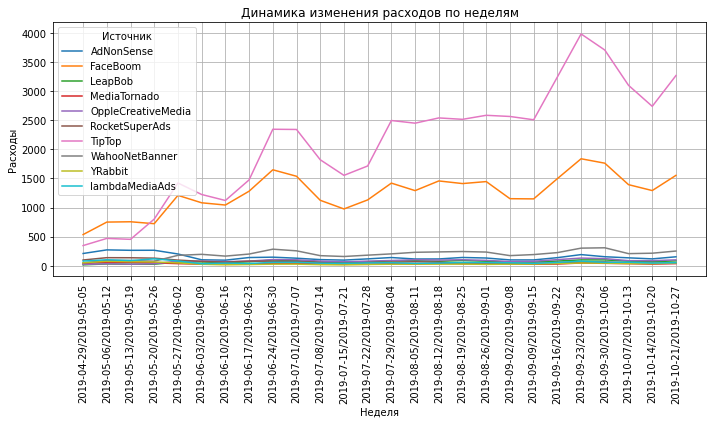

In [27]:
profiles1['week'] = profiles1['dt'].dt.to_period('W')  # Выделяем недели

weekly_costs = profiles1.groupby(['week', 'channel']).agg({'acquisition_cost': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
for channel in weekly_costs['channel'].unique():
    channel_data = weekly_costs[weekly_costs['channel'] == channel]
    plt.plot(channel_data['week'].astype(str), channel_data['acquisition_cost'], label=channel)

plt.title('Динамика изменения расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.xticks(rotation=90)
plt.legend(title='Источник')
plt.grid(True)
plt.tight_layout()

plt.show()

/tmp/ipykernel_48/4266051080.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  channel_data = monthly_costs[weekly_costs['channel'] == channel]
/tmp/ipykernel_48/4266051080.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  channel_data = monthly_costs[weekly_costs['channel'] == channel]
/tmp/ipykernel_48/4266051080.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  channel_data = monthly_costs[weekly_costs['channel'] == channel]
/tmp/ipykernel_48/4266051080.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  channel_data = monthly_costs[weekly_costs['channel'] == channel]
/tmp/ipykernel_48/4266051080.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  channel_data = monthly_costs[weekly_costs['channel'] == channel]
/tmp/ipykernel_48/4266051080.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.

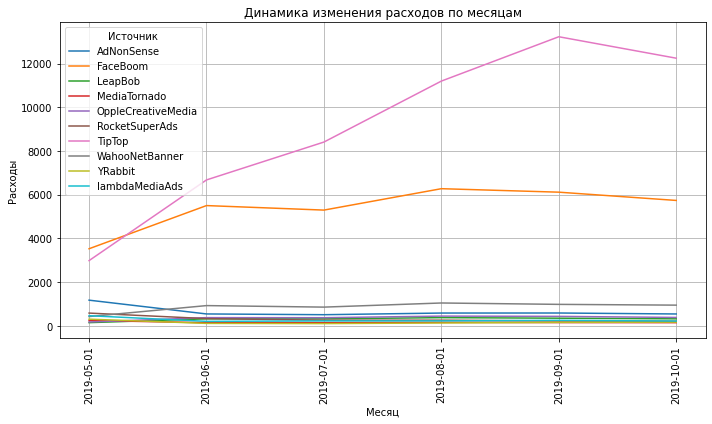

In [28]:

monthly_costs = profiles1.groupby(['month', 'channel']).agg({'acquisition_cost': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
for channel in monthly_costs['channel'].unique():
    channel_data = monthly_costs[weekly_costs['channel'] == channel]
    plt.plot(channel_data['month'].astype(str), channel_data['acquisition_cost'], label=channel)

plt.title('Динамика изменения расходов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.xticks(rotation=90)
plt.legend(title='Источник')
plt.grid(True)
plt.tight_layout()

plt.show()

Выводы:
- Исходя из динамики расходов по неделям и месяцам, можно сделать вывод, что расходы на такие каналы, как Tip Top b FaceBoom росли по возрастающей с течением времени, особенно виден скачок в расходах на Tip Top в сентябре.
- остальные каналы имеют стабильные траты без реских скачков и повышений количества вложенных стедств. 

- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

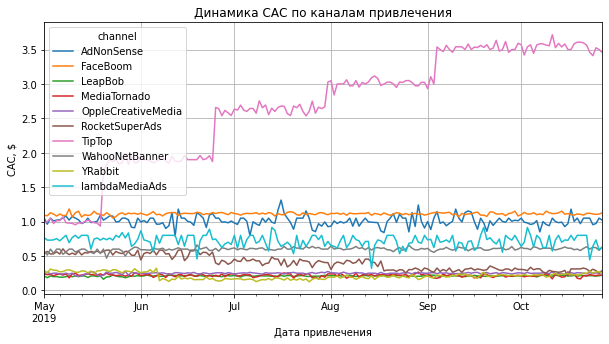

In [29]:
profiles1.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()


In [30]:
CAC = profiles1.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='mean')
CAC.sort_values(by = 'acquisition_cost', ascending = False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Выводы: 
- Наибольшая стоимость привлечения одного пользователя у канала TipTop, почти в три раза меньше FaceBoom и AdNonSense, самых "дешевых" пользователей привлекали: OppleCreativeMedia, YRabbit, MediaTornado, LeapBob.
- На графике выдно. что стоимость одного пользователя из всех каналов стабильна, и только стоимость на канале TipTop постоянно растет.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Я считаю, что органические пользователи не нужны для анализа, потому что не являются привлеченными клиентами и будут искажать картину.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

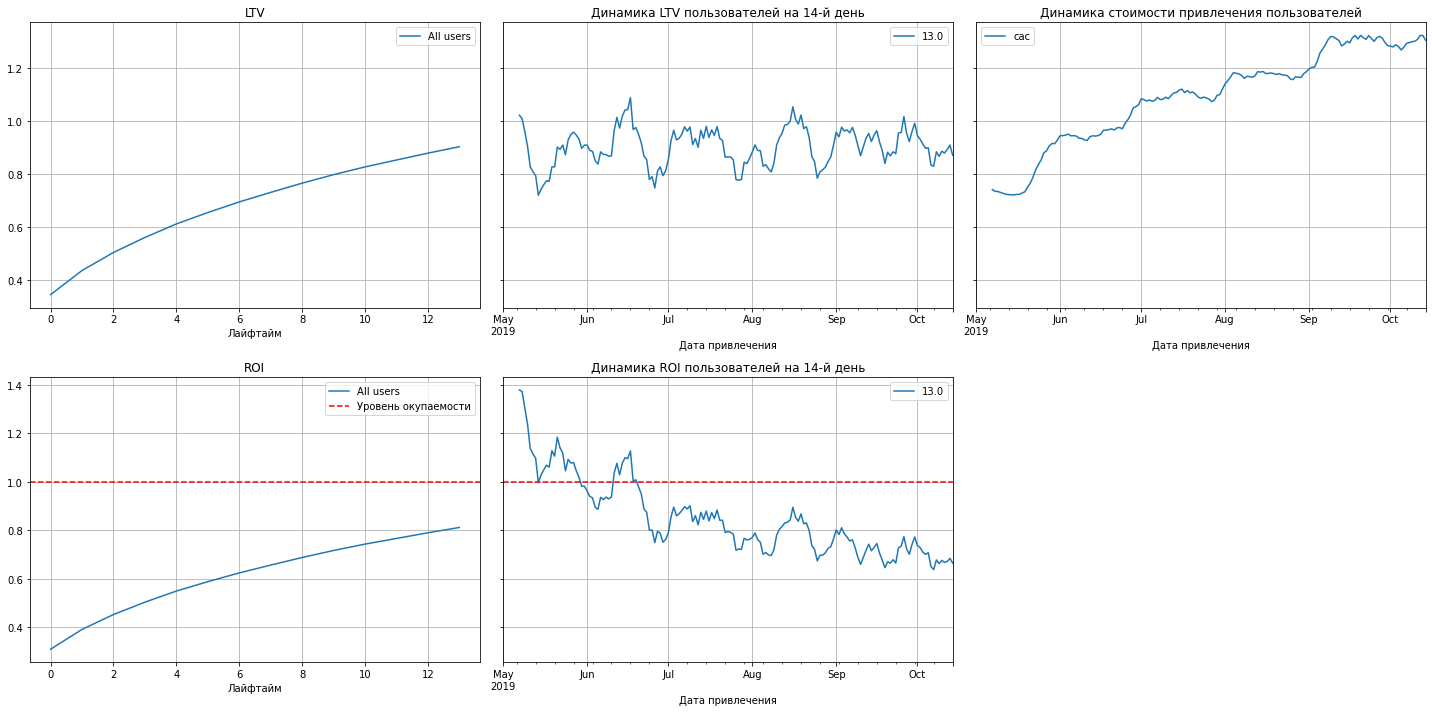

In [31]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Выводы: 
- Реклама не окупается. ROI в конце 2-х недельного срока — чуть выше 80%.
- Наблюдаются проблемы которые начались в июне, по графику ROI видно, что на 14 день реклама перестала окупаться и график идет на спад.
- CAC имеет восходящую динамику. Значит, возможно дело в увеличении рекламного бюджета.
- LTV достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

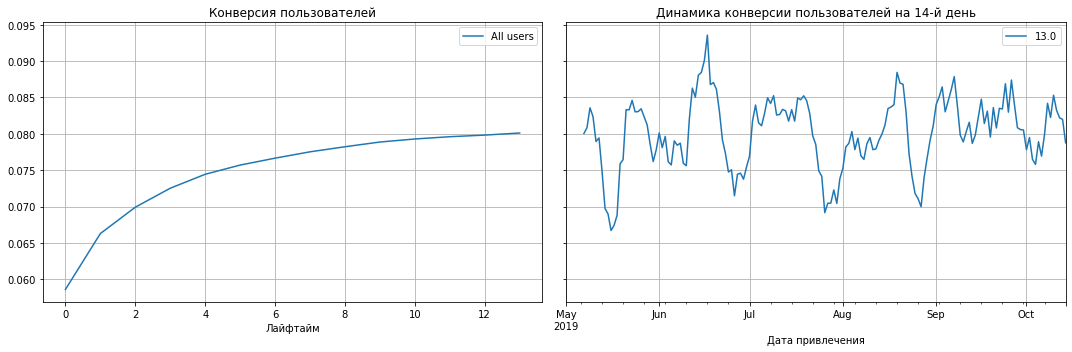

In [32]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Выводы: общая конверсия выглядит низкой, считаю нужно рассмотреть конверсию по странам, чтобы дучше понять ситуацию. 

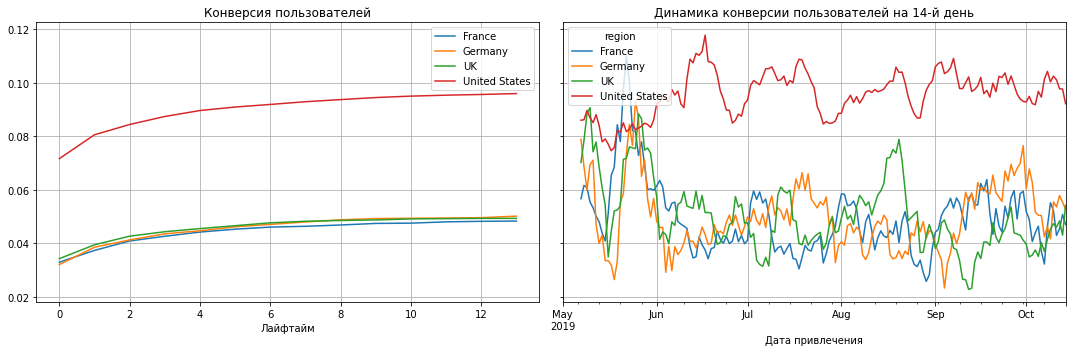

In [33]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Выводы: конверсия США также низкая, однако она в два раза выше, чем другие представленные страны.

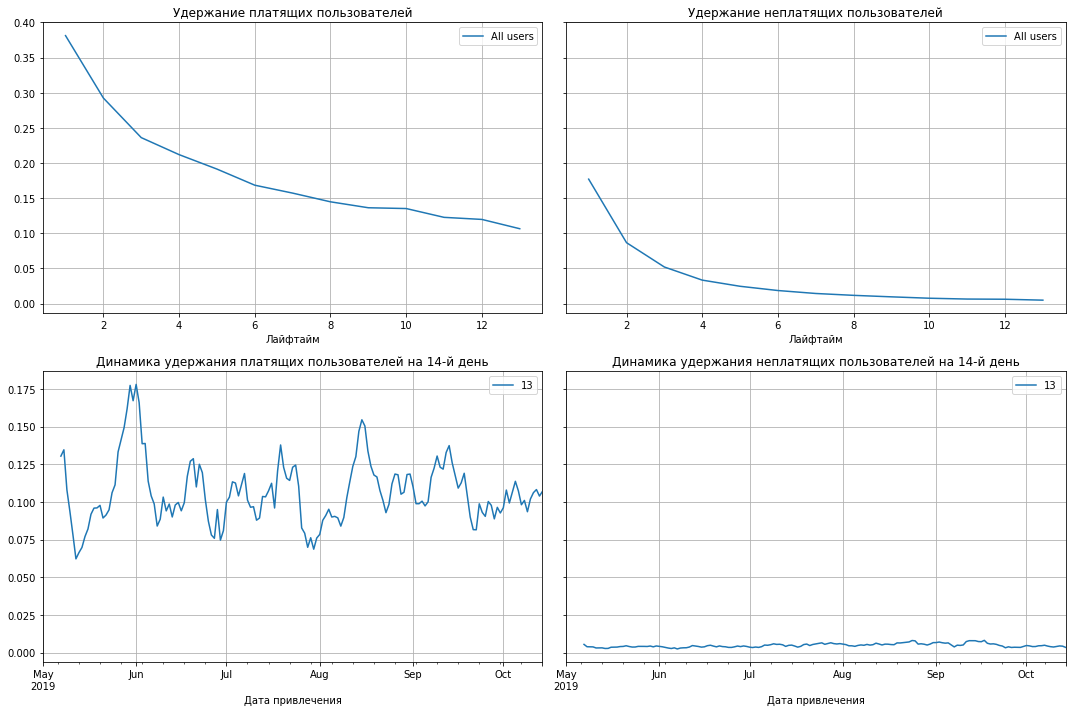

In [34]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы: общее удержание платящих пользователей очень низкое, рассмотрим также удержание по странам.

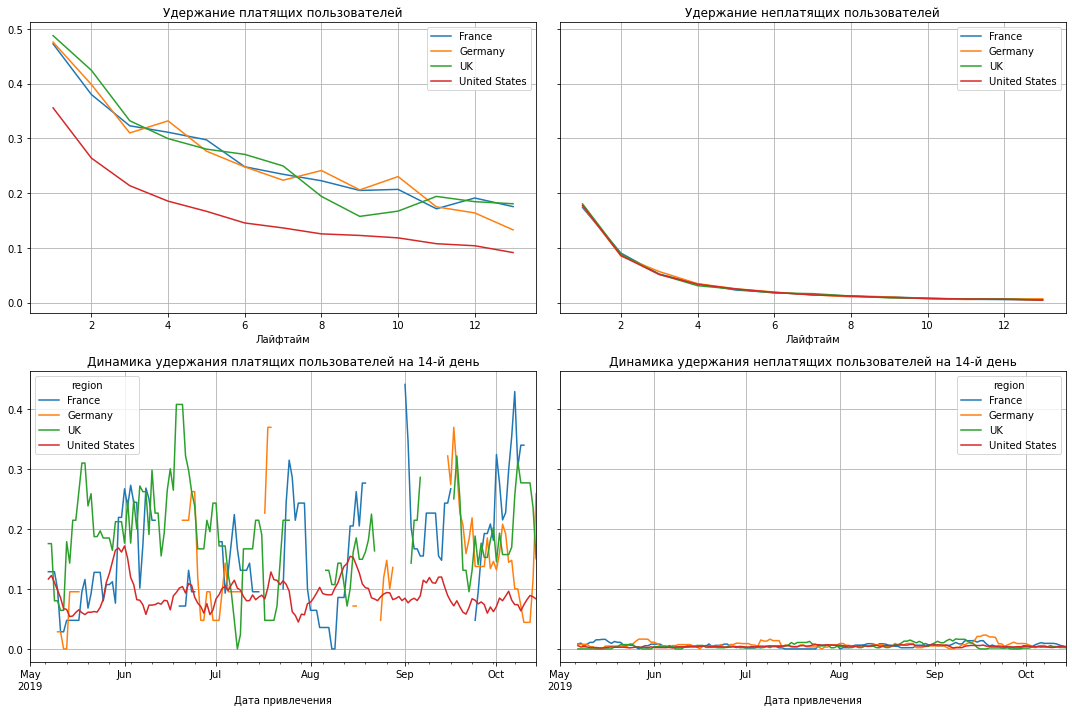

In [35]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Вывод: удержание платящих пользователей США самое низкое, а это самая крупная группа пользователей.

<div class="alert alert-info"> <b>Комментарий студента:</b> Рассмотрим удержание и конверсию по каналам:</div>

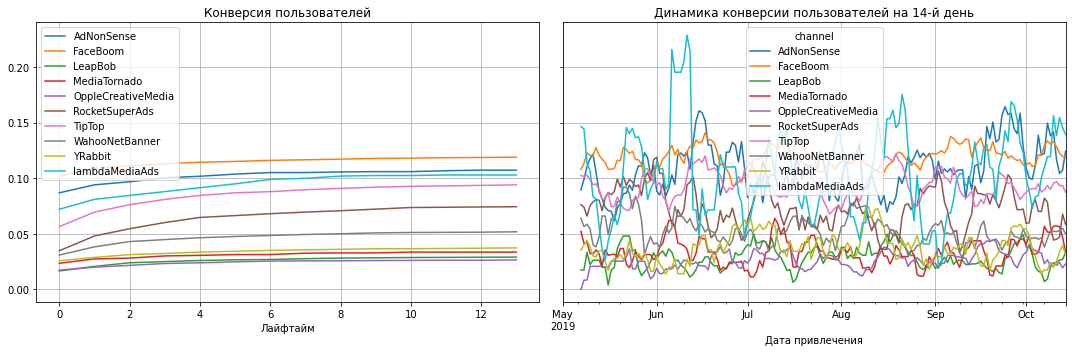

In [43]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

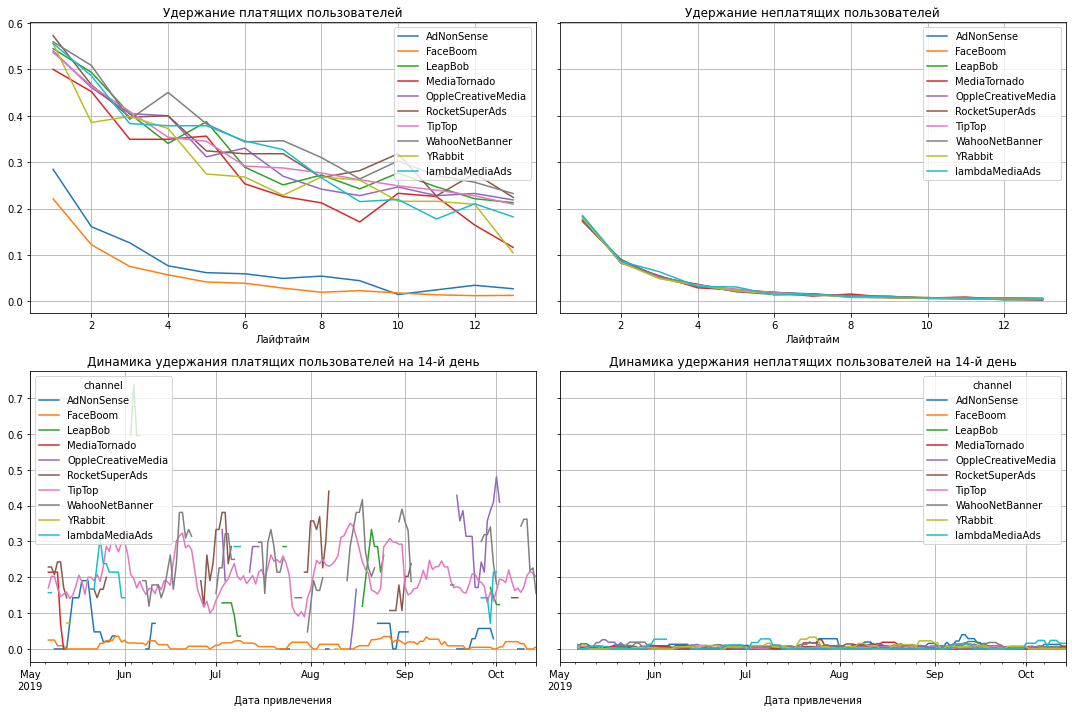

In [44]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-info"> <b>Комментарий студента:  </b> каналы привлечения деменстрируют невысокую конверсию, отсутствие динамики конверсии и низкое удержание пользователей, особенно плохо удерживаются пользователи, привлеченные каналами: AdNonSence и FaceBoom. </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Рассмотрим удержание и конверсию по типу устройства:</div>

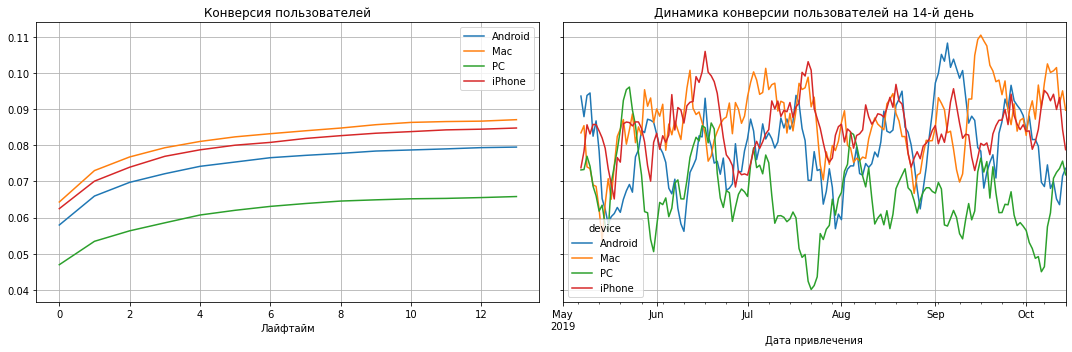

In [45]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

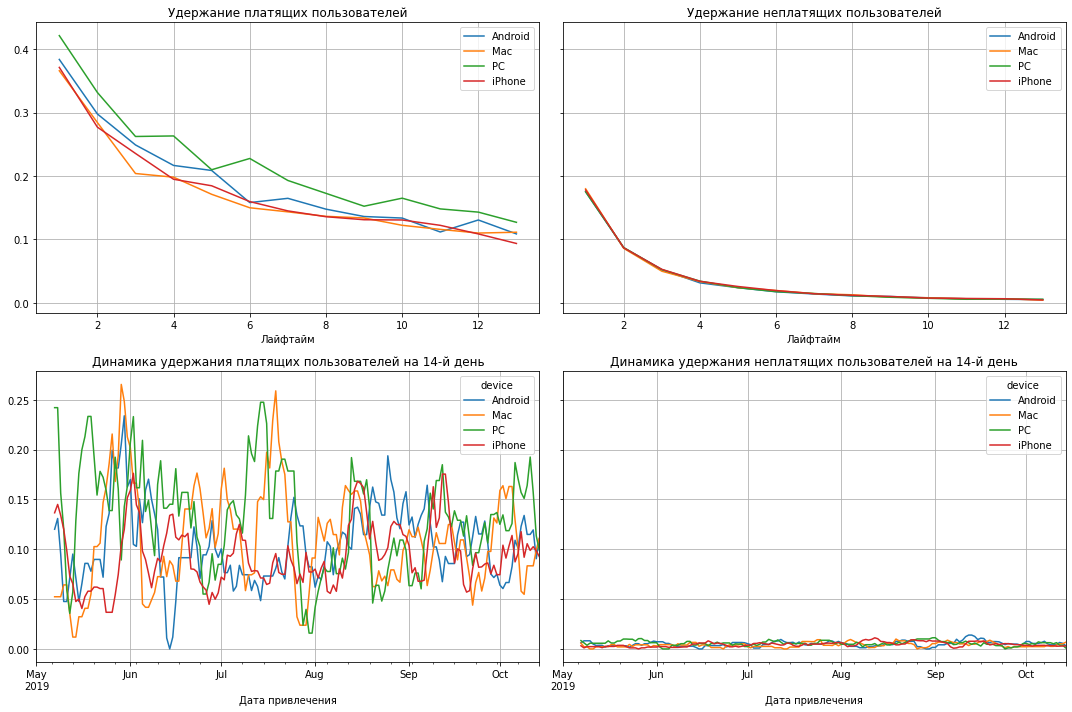

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-info"> <b>Комментарий студента:</b> Пользователи PC конвертируются хуже остальных, однако удержание платящих пользователей PC немного выше. Больше всего привлекаются пользователи Apple. </div>

- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

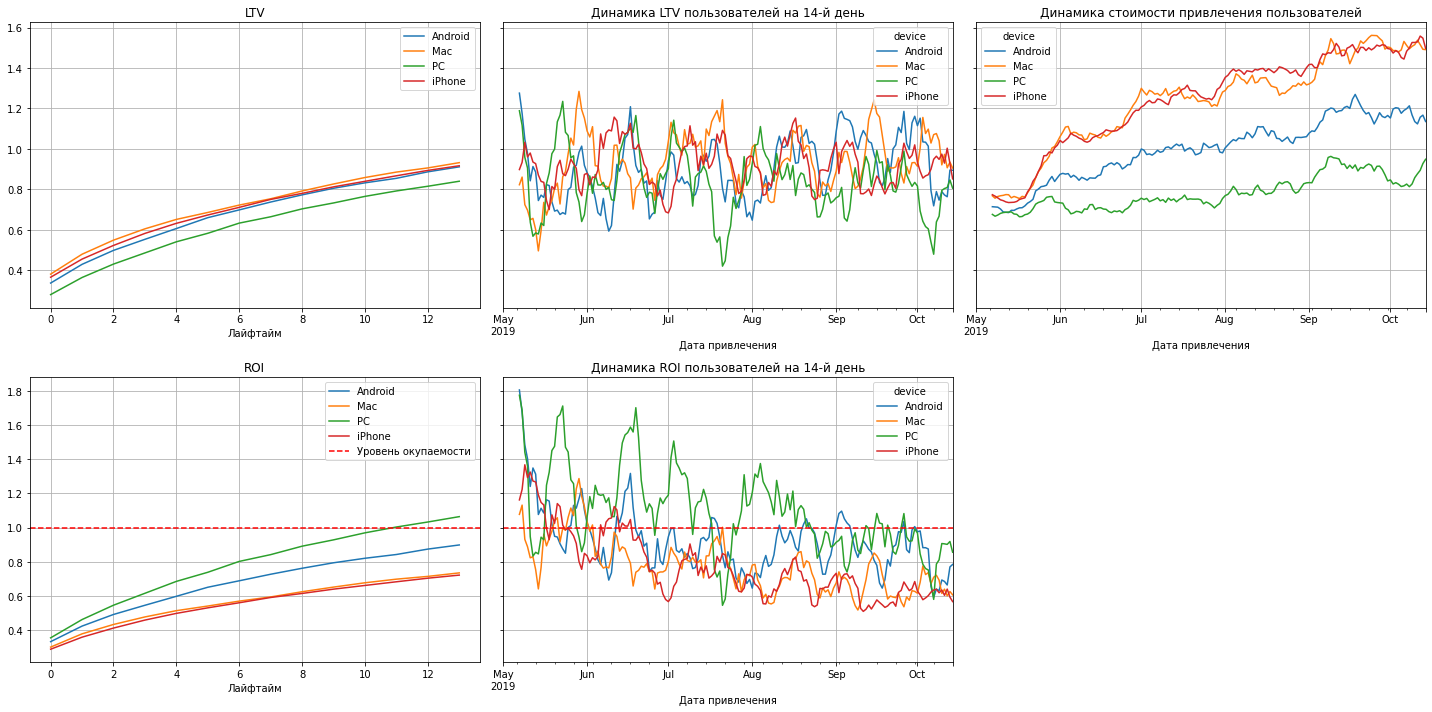

In [37]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions = dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Выводы:
- пользователи PC и Andriod имеют окупаемость выше, чем пользователи МАС OS.

- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

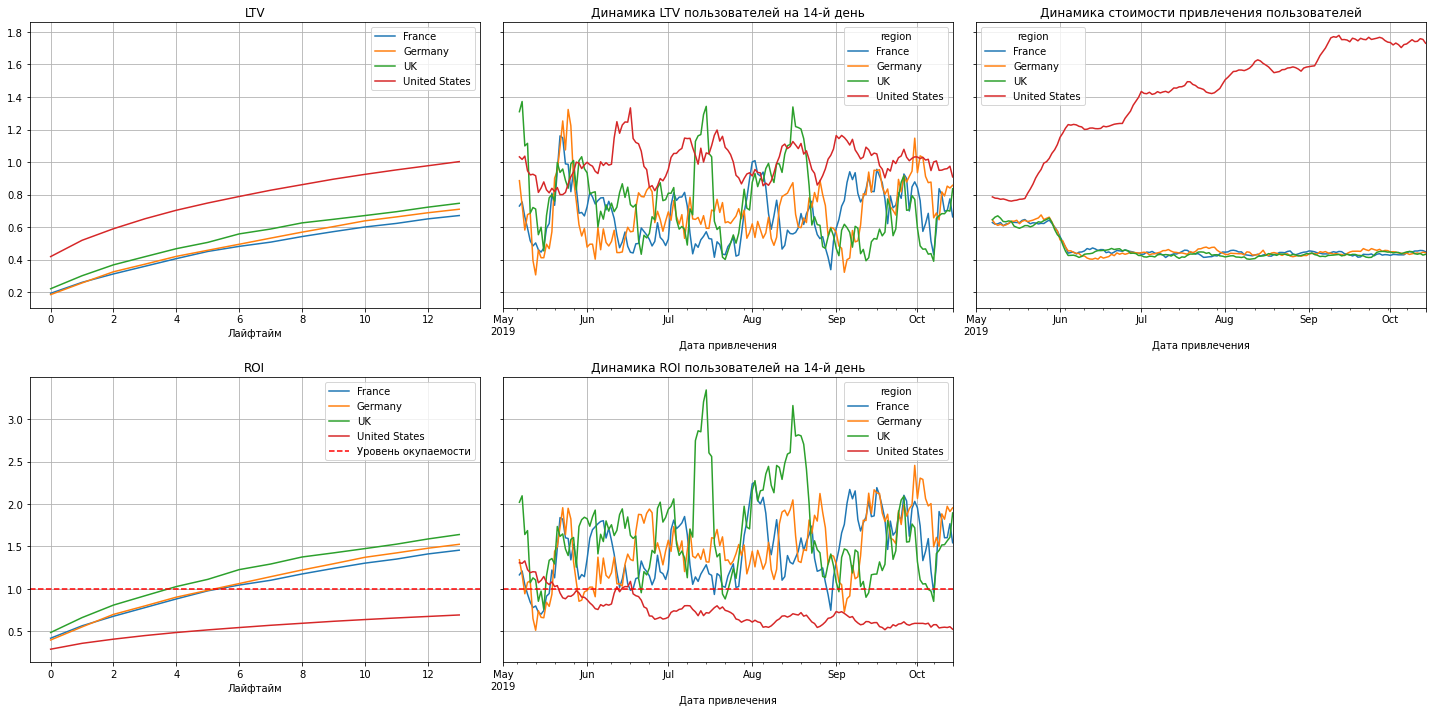

In [38]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions = dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Хочу обратить внимание на сходство стоимости привлечения `US` и `Tip Top` это неспроста)

Выводы: пользователи из США имеют самую высокую стоимость привлечения и самую низкую окупаемость, стоит обратить внимание на эту страну.

- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

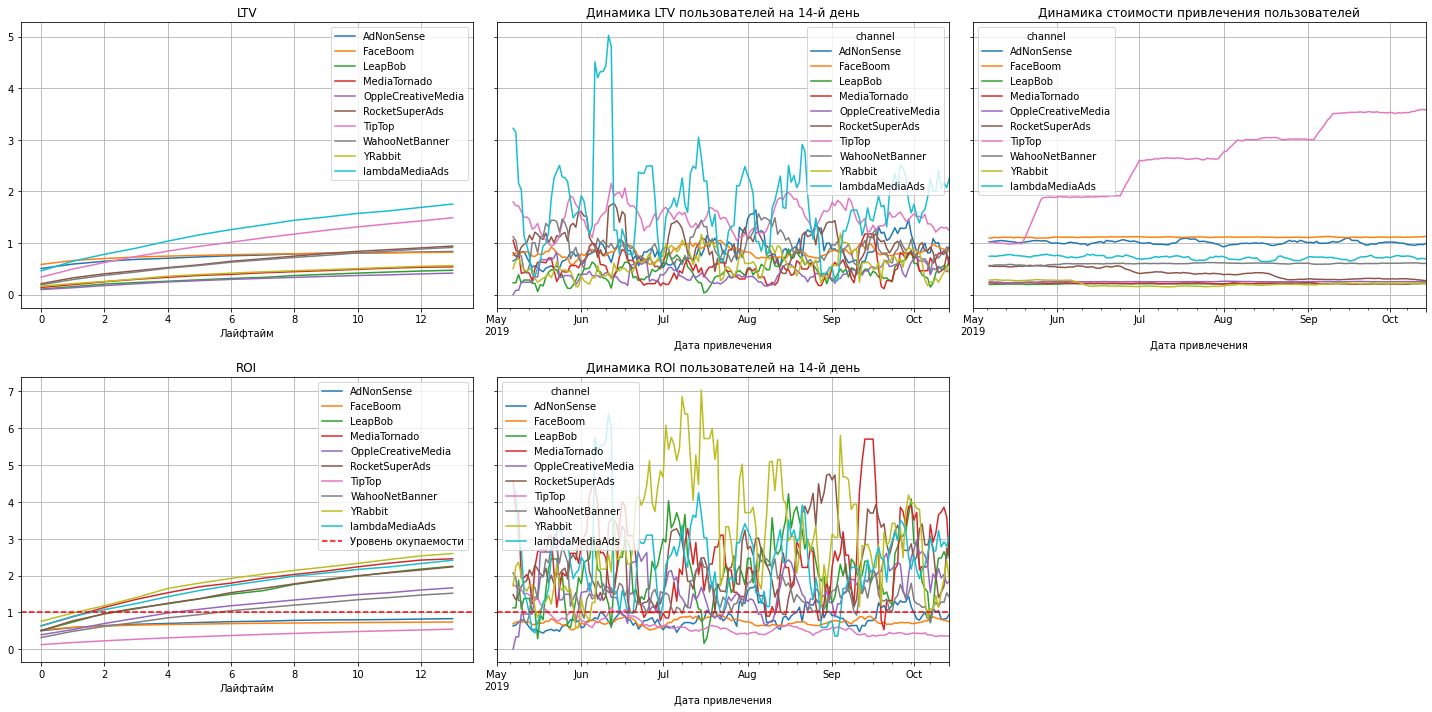

In [39]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions = dimensions)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Чудеса декомпозиции,  отличный подход, который всегда приведёт к успеху, разобрались с LTV И ROI, получили явную проблему в US и TIp Top с Faceboom, при учете, что US - страна с наибольшим количеством пользователей, а Tip TOp и FaceBoom - крупнешие каналы для нас это важные находки, дальше с которыми стоит работать</div>


Окупаемость по рекламным каналам ужасная, а бюджеты огромные, рассмотрим тепловую карту.

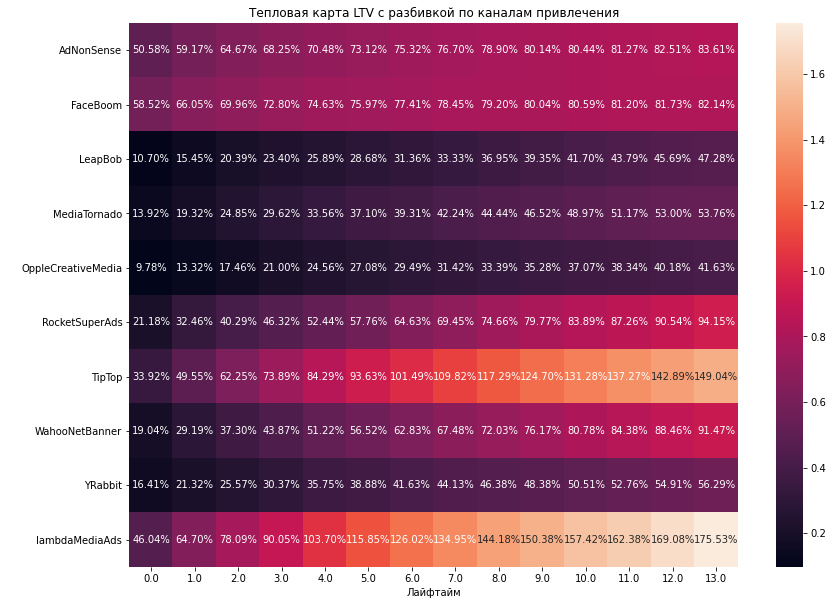

In [40]:
plt.figure(figsize=(30, 10))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.2%', 
    ax=plt.subplot(1, 2, 2)
            )
plt.title('Тепловая карта LTV с разбивкой по каналам привлечения')
plt.xlabel('Лайфтайм')
plt.ylabel(' ')
plt.show()

lambdaMediaAds и RoketSuperAds показывают хорошие результаты. 

Рассмотрим, сколько денег тратится на дорогие и неокупающиеся каналы.

In [41]:
CAC = profiles1.pivot_table(
    index='channel', values='acquisition_cost', aggfunc='sum')
CAC['%_of_total'] = CAC['acquisition_cost']/cotal_costs
CAC = CAC.sort_values(by = '%_of_total', ascending = False)
CAC

,acquisition_cost,%_of_total
channel,,
TipTop,54751.30,0.518983
FaceBoom,32445.60,0.307549
WahooNetBanner,5151.00,0.048826
AdNonSense,3911.25,0.037074
OppleCreativeMedia,2151.25,0.020392
RocketSuperAds,1833.00,0.017375
LeapBob,1797.60,0.017039
lambdaMediaAds,1557.60,0.014764
MediaTornado,954.48,0.009047


80% бюджета уходит только на два канала - TipTop и FaceBoom, рассмотрим отдельно их на графике.	

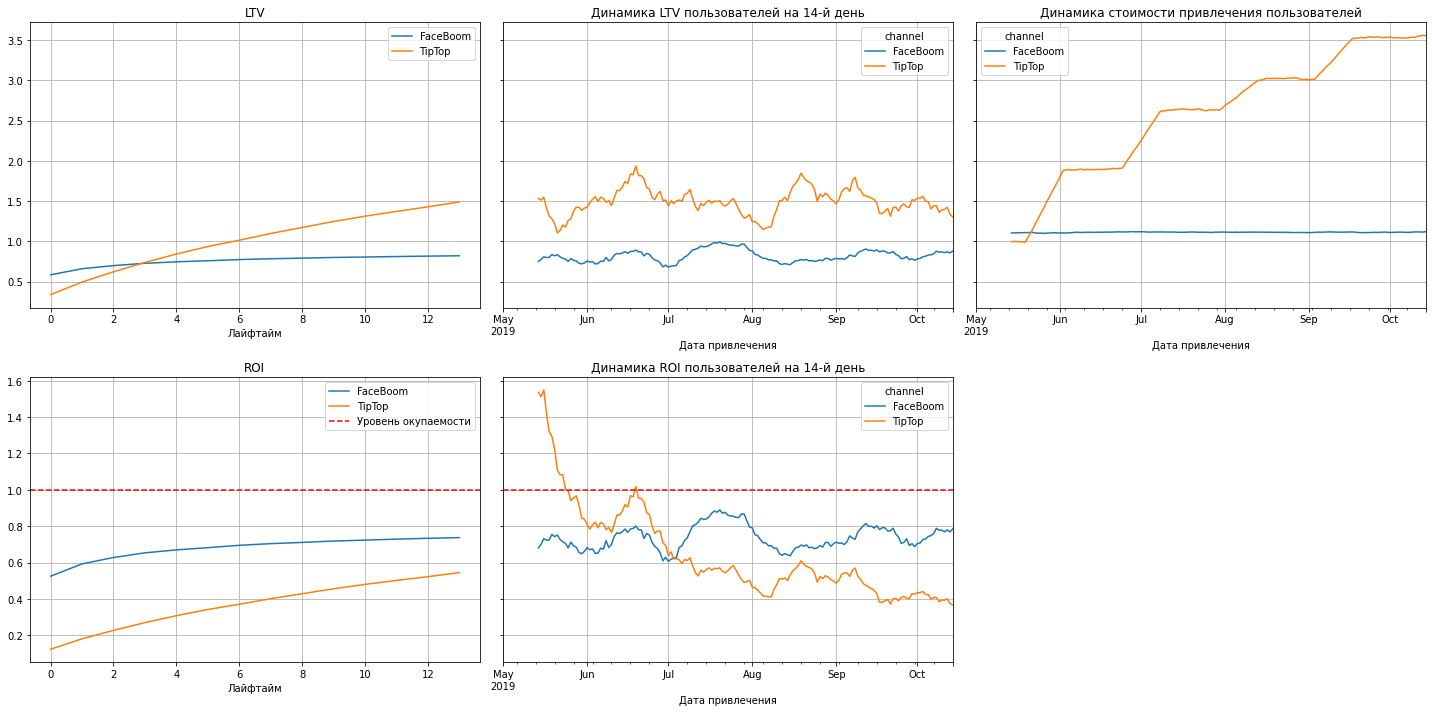

In [42]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel == ["TipTop", "FaceBoom"]'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Каналы показывают ужаснейшие результаты при огромном бюджете, стоит обратить на это пристальное внимание. 

Выводы: 
- самые дорогие 3 канала по привлечению (Top Top, FaceBoom, AdNonSense) не окупаются
- в отличие от остальных каналов, которые показывают хорошие результаты
- на "дорогие" каналы тратятся бОльшее количество средств компании, что ведет к убытку
- стоит пересмотреть распределение средств и отдать предпочтение другим, более перспективным каналам

- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Вывод: 
- Реклама, направленная на привлечение пользователей в целом не окупается, компания находится в убытке.
- PC и Android имеют бОльшую окупаемость, чем Мас и Iphone, возможно дело в сложностях установки на IOS, или же в ограничениях, стоит обратить на это внимание. 
- Пользователи из США показывают очень низкую окупаемость и удержание, стоит поработать над рекламной компанией для этой страны, так как она составляет бОльшую часть аудитории. 
- Самой большой проблемой, которая влияет на прибыль компании, я считаю привлеченные каналы продвижения приложения. Самые дорогие каналы показывают ужасные результаты окупаемости при 80% вложенных из бюджета стедств. Видно увеличение бюджета на рекламу в июле, следом за которым пошел спад окупаемости. Педлагаю пересмотреть выбор каналов для привлечения и вложить средства вболее перспективные предложения. 
- lambdaMediaAds и RoketSuperAds показывают хорошие результаты. 

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В ходе работы мною была проанализирована компания, работающая над приложением Procrastinate Pro+. 
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. 

Я работала с данными о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.

Приложение используется на таких устройствах, как PC, Android, Мас и Iphone. 

Работает компания с такими странами, как США, Великобритания, Франция и Германия. 

В ходе анализа были выведены следующие закономерности, показывающие неэффективность привлечения пользователей: 

- Реклама не приносит прибыли, а только увеличивает убытки. 

- Самая обширная по количеству пользователей страна (США), показывает низкую окупаемость.

- Пользователи PC и Android демонстрируют более высокие результаны, нежели Мас и Iphone. 

- Каналы, на которые тратится практически весь бюджет несут только убытки. 

Я могу дать следующие рекомендации: 

- PC и Android имеют большую окупаемость, чем Мас и Iphone, возможно дело в сложностях установки на IOS, или же в ограничениях, стоит обратить на это внимание. 

- Пользователи из США показывают очень низкую окупаемость и удержание, стоит поработать над рекламной компанией для этой страны. Можно подключить каналы продвижения, популярные в США, так как они составляет бОльшую часть аудитории. 

- Самой большой проблемой, которая влияет на прибыль компании, я считаю привлеченные каналы продвижения приложения. Самые дорогие каналы показывают ужасные результаты окупаемости при 80% вложенных из бюджета стедств. Видно увеличение бюджета на рекламу в июле, следом за которым пошел спад окупаемости. Педлагаю пересмотреть выбор каналов для привлечения и вложить средства вболее перспективные предложения. 

- lambdaMediaAds и RoketSuperAds показывают хорошие результаты, имея небольшую стоимость и высокую долю привлечения пользлвателей.